# GGIR comparisons 2.8.2(HBC recent) & 3.2.6(Newest version)

## Computational Differences
- 2.8.6 -> 3.2.6 most changes are to sleep, efficiency, and outputs
- Did not run 3.2.6 with sleep logs yet - many problems with the way sleep logs expected to work and our use of session

In [50]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

***Test with one subject to find relevant metrics***

In [51]:
test_df_new = pd.read_csv('/Volumes/vosslabhpc/Projects/BOOST/ObservationalStudy/3-experiment/data/act-obs-test/derivatives/GGIR-3.2.6-test/sub-7012/accel/output_accel/results/part4_nightsummary_sleep_cleaned.csv')
test_df_new

,ID,night,sleeponset,wakeup,SptDuration,sleepparam,guider_onset,guider_wakeup,guider_SptDuration,fraction_night_invalid,...,sleeplog_ID,acc_available,guider,SleepRegularityIndex1,SriFractionValid,longitudinal_axis,GGIRversion,window,nonwear_perc_spt,ACC_spt_mg
0,sub-7012,2,21.907,30.664,8.757,T5A5,21.836,30.743,8.907,0.000,...,NaN,1,HDCZA,37.281,0.792,NaN,3.2.6,WW,0.000,3.610
1,sub-7012,3,21.418,30.006,8.588,T5A5,21.417,30.008,8.592,0.042,...,NaN,1,HDCZA,56.014,0.958,NaN,3.2.6,WW,11.645,4.810
2,sub-7012,4,20.853,29.010,8.157,T5A5,20.858,29.085,8.226,0.000,...,NaN,1,HDCZA,65.486,1.000,NaN,3.2.6,WW,0.000,3.052
3,sub-7012,5,22.176,29.363,7.186,T5A5,22.188,29.389,7.201,0.000,...,NaN,1,HDCZA,67.361,1.000,NaN,3.2.6,WW,0.000,1.890
4,sub-7012,6,22.235,30.658,8.424,T5A5,22.243,30.714,8.471,0.000,...,NaN,1,HDCZA,56.458,1.000,NaN,3.2.6,WW,0.000,2.139
5,sub-7012,7,21.808,30.478,8.669,T5A5,21.804,30.290,8.486,0.000,...,NaN,1,HDCZA,64.127,0.875,NaN,3.2.6,WW,0.000,7.013


In [52]:
test_df_old = pd.read_csv('/Volumes/vosslabhpc/Projects/BOOST/ObservationalStudy/3-experiment/data/act-obs-test/derivatives/GGIR-2.8.2-test/sub-7012/ses-1/output_accel/results/part4_nightsummary_sleep_cleaned.csv')
test_df_old

,ID,night,sleeponset,wakeup,SptDuration,sleepparam,guider_onset,guider_wakeup,guider_SptDuration,fraction_night_invalid,...,weekday,calendar_date,filename,cleaningcode,sleeplog_used,acc_available,guider,SleepRegularityIndex,SriFractionValid,longitudinal_axis
0,sub-7012_ses-1_accel.csv,1,24.267,31.296,7.029,T5A5,24.001,31.819,7.818,0.5,...,Thursday,29/8/2024,sub-7012_ses-1_accel.csv.RData,1,0,1,HDCZA,NaN,NaN,NaN
1,sub-7012_ses-1_accel.csv,2,21.907,30.664,8.757,T5A5,21.797,30.704,8.907,0.0,...,Friday,30/8/2024,sub-7012_ses-1_accel.csv.RData,1,0,1,HDCZA,NaN,NaN,NaN
2,sub-7012_ses-1_accel.csv,3,21.292,30.006,8.714,T5A5,21.378,29.969,8.592,0.0,...,Saturday,31/8/2024,sub-7012_ses-1_accel.csv.RData,1,0,1,HDCZA,NaN,NaN,NaN
3,sub-7012_ses-1_accel.csv,4,20.853,29.010,8.157,T5A5,20.819,29.046,8.226,0.0,...,Sunday,1/9/2024,sub-7012_ses-1_accel.csv.RData,1,0,1,HDCZA,NaN,NaN,NaN
4,sub-7012_ses-1_accel.csv,5,22.176,29.363,7.186,T5A5,22.149,29.350,7.201,0.0,...,Monday,2/9/2024,sub-7012_ses-1_accel.csv.RData,1,0,1,HDCZA,NaN,NaN,NaN
5,sub-7012_ses-1_accel.csv,6,22.235,30.658,8.424,T5A5,22.204,30.675,8.471,0.0,...,Tuesday,3/9/2024,sub-7012_ses-1_accel.csv.RData,1,0,1,HDCZA,NaN,NaN,NaN
6,sub-7012_ses-1_accel.csv,7,21.808,30.478,8.669,T5A5,21.765,30.251,8.486,0.0,...,Wednesday,4/9/2024,sub-7012_ses-1_accel.csv.RData,1,0,1,HDCZA,NaN,NaN,NaN


***It looks like oftentimes the newer version skips the first night...***
- dropping the first night for this test so that the nights are equal

In [53]:
#list differences in columns
diff_columns = set(test_df_new.columns) - set(test_df_old.columns)
print("Differences in columns between new and old GGIR versions:")
for col in diff_columns:
    print(col)

Differences in columns between new and old GGIR versions:
GGIRversion
nonwear_perc_spt
sleeplog_ID
SleepRegularityIndex1
ACC_spt_mg
window


In [54]:
test_df_new = test_df_new[test_df_new['night'] != 1]
test_df_old = test_df_old[test_df_old['night'] != 1]
test_df_old.reindex()
test_df_new.reindex()
test_df_old

,ID,night,sleeponset,wakeup,SptDuration,sleepparam,guider_onset,guider_wakeup,guider_SptDuration,fraction_night_invalid,...,weekday,calendar_date,filename,cleaningcode,sleeplog_used,acc_available,guider,SleepRegularityIndex,SriFractionValid,longitudinal_axis
1,sub-7012_ses-1_accel.csv,2,21.907,30.664,8.757,T5A5,21.797,30.704,8.907,0.0,...,Friday,30/8/2024,sub-7012_ses-1_accel.csv.RData,1,0,1,HDCZA,NaN,NaN,NaN
2,sub-7012_ses-1_accel.csv,3,21.292,30.006,8.714,T5A5,21.378,29.969,8.592,0.0,...,Saturday,31/8/2024,sub-7012_ses-1_accel.csv.RData,1,0,1,HDCZA,NaN,NaN,NaN
3,sub-7012_ses-1_accel.csv,4,20.853,29.010,8.157,T5A5,20.819,29.046,8.226,0.0,...,Sunday,1/9/2024,sub-7012_ses-1_accel.csv.RData,1,0,1,HDCZA,NaN,NaN,NaN
4,sub-7012_ses-1_accel.csv,5,22.176,29.363,7.186,T5A5,22.149,29.350,7.201,0.0,...,Monday,2/9/2024,sub-7012_ses-1_accel.csv.RData,1,0,1,HDCZA,NaN,NaN,NaN
5,sub-7012_ses-1_accel.csv,6,22.235,30.658,8.424,T5A5,22.204,30.675,8.471,0.0,...,Tuesday,3/9/2024,sub-7012_ses-1_accel.csv.RData,1,0,1,HDCZA,NaN,NaN,NaN
6,sub-7012_ses-1_accel.csv,7,21.808,30.478,8.669,T5A5,21.765,30.251,8.486,0.0,...,Wednesday,4/9/2024,sub-7012_ses-1_accel.csv.RData,1,0,1,HDCZA,NaN,NaN,NaN


In [55]:
test_df_new

,ID,night,sleeponset,wakeup,SptDuration,sleepparam,guider_onset,guider_wakeup,guider_SptDuration,fraction_night_invalid,...,sleeplog_ID,acc_available,guider,SleepRegularityIndex1,SriFractionValid,longitudinal_axis,GGIRversion,window,nonwear_perc_spt,ACC_spt_mg
0,sub-7012,2,21.907,30.664,8.757,T5A5,21.836,30.743,8.907,0.000,...,NaN,1,HDCZA,37.281,0.792,NaN,3.2.6,WW,0.000,3.610
1,sub-7012,3,21.418,30.006,8.588,T5A5,21.417,30.008,8.592,0.042,...,NaN,1,HDCZA,56.014,0.958,NaN,3.2.6,WW,11.645,4.810
2,sub-7012,4,20.853,29.010,8.157,T5A5,20.858,29.085,8.226,0.000,...,NaN,1,HDCZA,65.486,1.000,NaN,3.2.6,WW,0.000,3.052
3,sub-7012,5,22.176,29.363,7.186,T5A5,22.188,29.389,7.201,0.000,...,NaN,1,HDCZA,67.361,1.000,NaN,3.2.6,WW,0.000,1.890
4,sub-7012,6,22.235,30.658,8.424,T5A5,22.243,30.714,8.471,0.000,...,NaN,1,HDCZA,56.458,1.000,NaN,3.2.6,WW,0.000,2.139
5,sub-7012,7,21.808,30.478,8.669,T5A5,21.804,30.290,8.486,0.000,...,NaN,1,HDCZA,64.127,0.875,NaN,3.2.6,WW,0.000,7.013


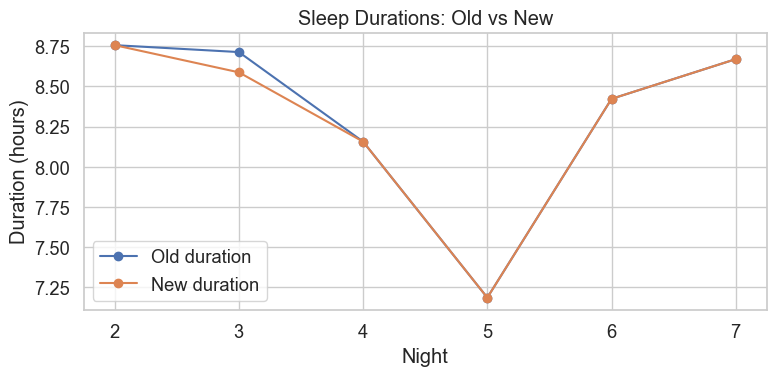

/var/folders/1w/l9hx8l952r57k_qmjhw7qc500000gn/T/ipykernel_66051/3694842027.py:33: UserWarning: Glyph 8208 (\N{HYPHEN}) missing from font(s) Arial.
  plt.tight_layout()
/Users/zakg04/miniconda3/envs/cpsy/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8208 (\N{HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


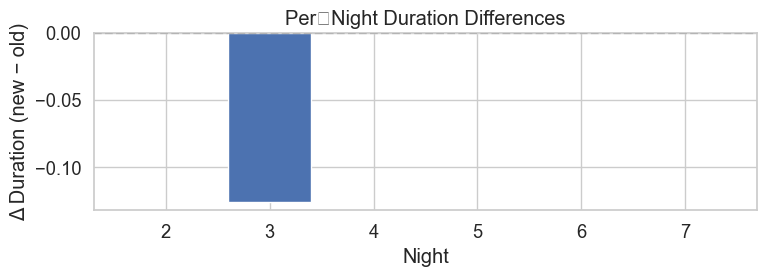

In [56]:
# Align old and new by night
merged = pd.merge(
    test_df_old[['night', 'sleeponset', 'wakeup']],
    test_df_new[['night', 'sleeponset', 'wakeup']],
    on='night',
    suffixes=('_old', '_new')
)

# Compute durations
dur_old = merged['wakeup_old'] - merged['sleeponset_old']
dur_new = merged['wakeup_new'] - merged['sleeponset_new']
events = merged['night']

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(events, dur_old, marker='o', label='Old duration')
plt.plot(events, dur_new, marker='o', label='New duration')
plt.xlabel('Night')
plt.ylabel('Duration (hours)')
plt.title('Sleep Durations: Old vs New')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,3))
plt.bar(events, dur_new - dur_old)
plt.axhline(0, color='k', linestyle='--')
plt.xlabel('Night')
plt.ylabel('Δ Duration (new − old)')
plt.title('Per‐Night Duration Differences')
plt.tight_layout()
plt.show()

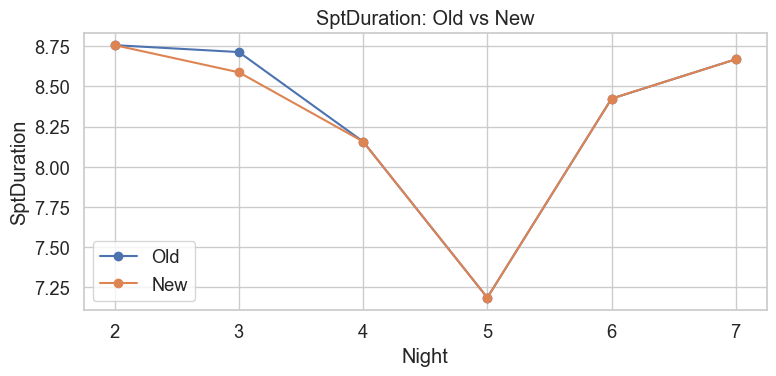

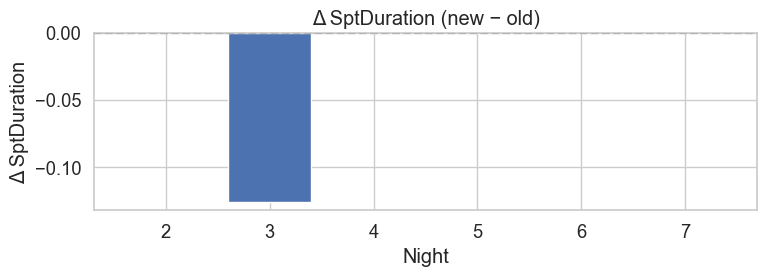

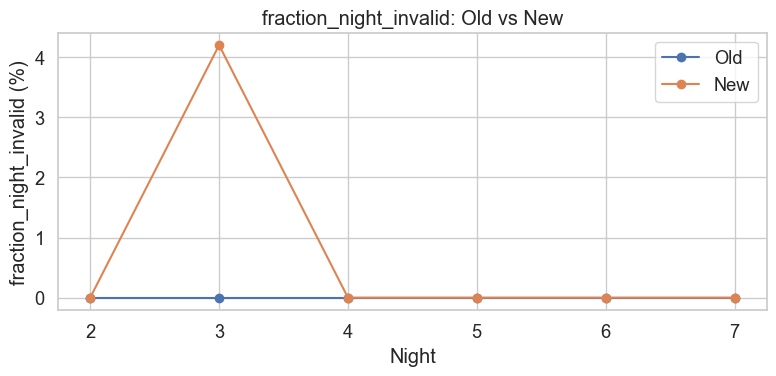

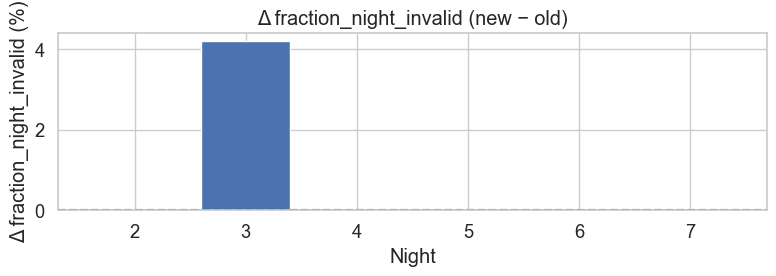

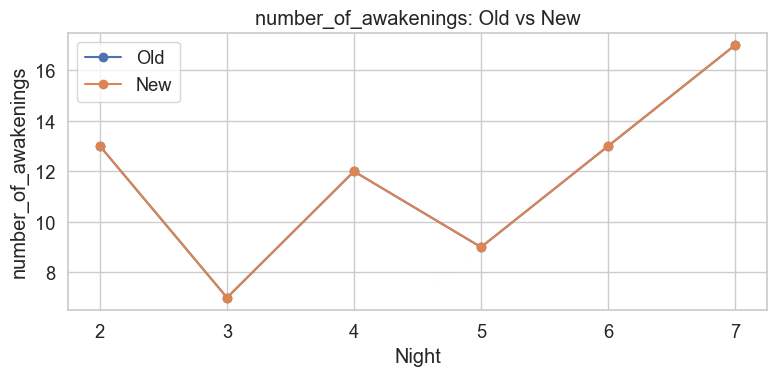

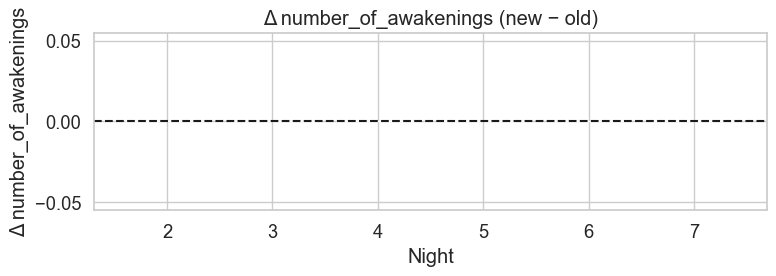

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Merge on 'night'
metrics = ['SptDuration', 'fraction_night_invalid', 'number_of_awakenings']
old_cols = ['night'] + metrics
new_cols = ['night'] + metrics

merged = pd.merge(
    test_df_old[old_cols],
    test_df_new[new_cols],
    on='night',
    suffixes=('_old', '_new')
)

# 2) Loop through each metric
for var in metrics:
    old = merged[f'{var}_old']
    new = merged[f'{var}_new']
    nights = merged['night']
    
    # If it's a fraction, convert to percent
    ylabel = var
    if var == 'fraction_night_invalid':
        old = old * 100
        new = new * 100
        ylabel += ' (%)'
    
    # Paired line plot
    plt.figure(figsize=(8,4))
    plt.plot(nights, old, marker='o', label='Old')
    plt.plot(nights, new, marker='o', label='New')
    plt.title(f'{var}: Old vs New')
    plt.xlabel('Night')
    plt.ylabel(ylabel)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Difference bar plot
    diff = new - old
    plt.figure(figsize=(8,3))
    plt.bar(nights, diff)
    plt.axhline(0, color='k', linestyle='--')
    plt.title(f'Δ {var} (new − old)')
    plt.xlabel('Night')
    plt.ylabel(f'Δ {ylabel}')
    plt.tight_layout()
    plt.show()

In [58]:
test_df_new_act = pd.read_csv('/Volumes/vosslabhpc/Projects/BOOST/ObservationalStudy/3-experiment/data/act-obs-test/derivatives/GGIR-3.2.6-test/sub-7012/accel/output_accel/results/part2_daysummary.csv') 
test_df_old_act = pd.read_csv('/Volumes/vosslabhpc/Projects/BOOST/ObservationalStudy/3-experiment/data/act-obs-test/derivatives/GGIR-2.8.2-test/sub-7012/ses-1/output_accel/results/part2_daysummary.csv')

In [59]:
test_df_old_act

,ID,filename,calendar_date,bodylocation,N.valid.hours,N.hours,weekday,measurementday,L5hr_ENMO_mg_0.24hr,L5_ENMO_mg_0.24hr,...,X.575.600._ENMO_mg_0.24hr,ig_gradient_ENMO_0.24hr,ig_intercept_ENMO_0.24hr,ig_rsquared_ENMO_0.24hr,MVPA_E5S_T100_ENMO_0.24hr,MVPA_E1M_T100_ENMO_0.24hr,MVPA_E5M_T100_ENMO_0.24hr,MVPA_E5S_B1M80._T100_ENMO_0.24hr,MVPA_E5S_B5M80._T100_ENMO_0.24hr,MVPA_E5S_B10M80._T100_ENMO_0.24hr
0,sub-7012_ses-1_accel.csv,sub-7012_ses-1_accel.csv,2024-08-30T00:00:00+0000,not extracted,24,24,Friday,1,1.333,2.094,...,0.000,-2.546,14.381,0.915,60.167,45,15,22.500,0.000,0.000
1,sub-7012_ses-1_accel.csv,sub-7012_ses-1_accel.csv,2024-08-31T00:00:00+0000,not extracted,24,24,Saturday,2,1.667,2.228,...,0.167,-2.236,13.533,0.838,133.083,145,130,87.667,70.917,58.583
2,sub-7012_ses-1_accel.csv,sub-7012_ses-1_accel.csv,2024-09-01T00:00:00+0000,not extracted,24,24,Sunday,3,21.833,3.640,...,0.417,-2.330,14.220,0.886,164.333,171,160,102.833,74.583,66.833
3,sub-7012_ses-1_accel.csv,sub-7012_ses-1_accel.csv,2024-09-02T00:00:00+0000,not extracted,24,24,Monday,4,22.167,2.662,...,0.083,-2.408,14.643,0.786,224.833,240,250,138.500,102.833,64.500
4,sub-7012_ses-1_accel.csv,sub-7012_ses-1_accel.csv,2024-09-03T00:00:00+0000,not extracted,24,24,Tuesday,5,22.333,0.572,...,0.083,-2.608,14.682,0.957,61.667,45,25,10.000,0.000,0.000
5,sub-7012_ses-1_accel.csv,sub-7012_ses-1_accel.csv,2024-09-04T00:00:00+0000,not extracted,24,24,Wednesday,6,1.333,0.539,...,0.083,-2.567,14.369,0.949,50.167,40,10,12.167,0.000,0.000
6,sub-7012_ses-1_accel.csv,sub-7012_ses-1_accel.csv,2024-09-05T00:00:00+0000,not extracted,24,24,Thursday,7,22.000,2.859,...,0.000,-2.653,14.796,0.962,52.167,32,10,8.917,0.000,0.000


In [60]:
test_df_new_act

,ID,filename,start_time,calendar_date,bodylocation,N valid hours,N hours,weekday,measurementday,L5hr_ENMO_mg_0-24hr,...,M5hr_ENMO_mg_0-24hr,M5_ENMO_mg_0-24hr,mean_ENMO_mg_1-6am,mean_ENMO_mg_0-24hr,MVPA_E5S_T100_ENMO_0-24hr,MVPA_E1M_T100_ENMO_0-24hr,MVPA_E5M_T100_ENMO_0-24hr,MVPA_E5S_B1M80%_T100_ENMO_0-24hr,MVPA_E5S_B5M80%_T100_ENMO_0-24hr,MVPA_E5S_B10M80%_T100_ENMO_0-24hr
0,sub-7012,sub-7012_ses-1_accel.csv,2024-08-30T00:00:00-0500,2024-08-30,not extracted,20,24,Friday,1,25.333,...,14.667,37.245,3.390,17.606,59.500,45,15,25.750,0.000,0.000
1,sub-7012,sub-7012_ses-1_accel.csv,2024-08-31T00:00:00-0500,2024-08-31,not extracted,23,24,Saturday,2,25.667,...,8.833,99.653,3.021,27.244,132.167,144,125,90.667,75.667,58.417
2,sub-7012,sub-7012_ses-1_accel.csv,2024-09-01T00:00:00-0500,2024-09-01,not extracted,24,24,Sunday,3,21.833,...,7.500,104.160,4.377,35.586,163.917,170,160,110.833,73.917,65.500
3,sub-7012,sub-7012_ses-1_accel.csv,2024-09-02T00:00:00-0500,2024-09-02,not extracted,24,24,Monday,4,22.167,...,9.500,114.832,11.321,42.109,222.500,239,250,145.917,101.167,73.083
4,sub-7012,sub-7012_ses-1_accel.csv,2024-09-03T00:00:00-0500,2024-09-03,not extracted,24,24,Tuesday,5,22.333,...,16.000,36.714,7.418,17.694,61.083,45,25,13.083,0.000,0.000
5,sub-7012,sub-7012_ses-1_accel.csv,2024-09-04T00:00:00-0500,2024-09-04,not extracted,24,24,Wednesday,6,25.333,...,14.667,34.294,1.831,16.929,50.417,39,10,17.667,0.000,0.000
6,sub-7012,sub-7012_ses-1_accel.csv,2024-09-05T00:00:00-0500,2024-09-05,not extracted,21,24,Thursday,7,22.667,...,6.500,30.515,5.731,17.299,49.667,28,10,8.500,0.000,0.000


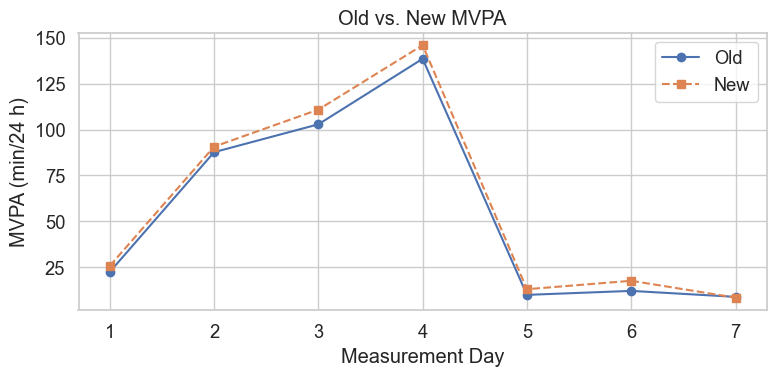

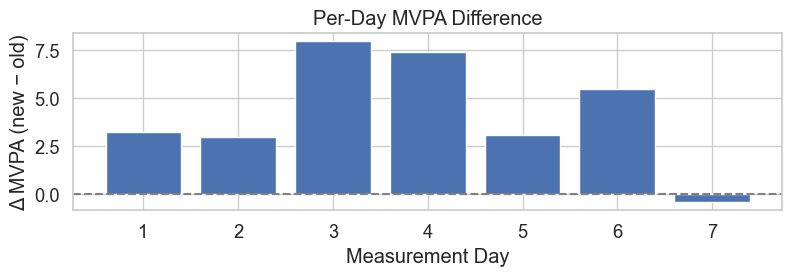

In [61]:
# 1) merge on the correct key
merged = pd.merge(
    test_df_old_act[['measurementday', 'MVPA_E5S_B1M80._T100_ENMO_0.24hr']],
    test_df_new_act[['measurementday', 'MVPA_E5S_B1M80%_T100_ENMO_0-24hr']],
    on='measurementday'
)

# 2) rename
merged = merged.rename(columns={
    'MVPA_E5S_B1M80._T100_ENMO_0.24hr':    'mvpa_old',
    'MVPA_E5S_B1M80%_T100_ENMO_0-24hr':    'mvpa_new'
})

# 3) extract and plot
days = merged['measurementday']
old  = merged['mvpa_old']
new  = merged['mvpa_new']
diff = new - old

# paired-line
plt.figure(figsize=(8,4))
plt.plot(days, old, 'o-', label='Old')
plt.plot(days, new, 's--', label='New')
plt.xlabel('Measurement Day')
plt.ylabel('MVPA (min/24 h)')
plt.title('Old vs. New MVPA')
plt.legend()
plt.tight_layout()
plt.show()

# bar of differences
plt.figure(figsize=(8,3))
plt.bar(days, diff)
plt.axhline(0, color='grey', linestyle='--')
plt.xlabel('Measurement Day')
plt.ylabel('Δ MVPA (new − old)')
plt.title('Per-Day MVPA Difference')
plt.tight_layout()
plt.show()

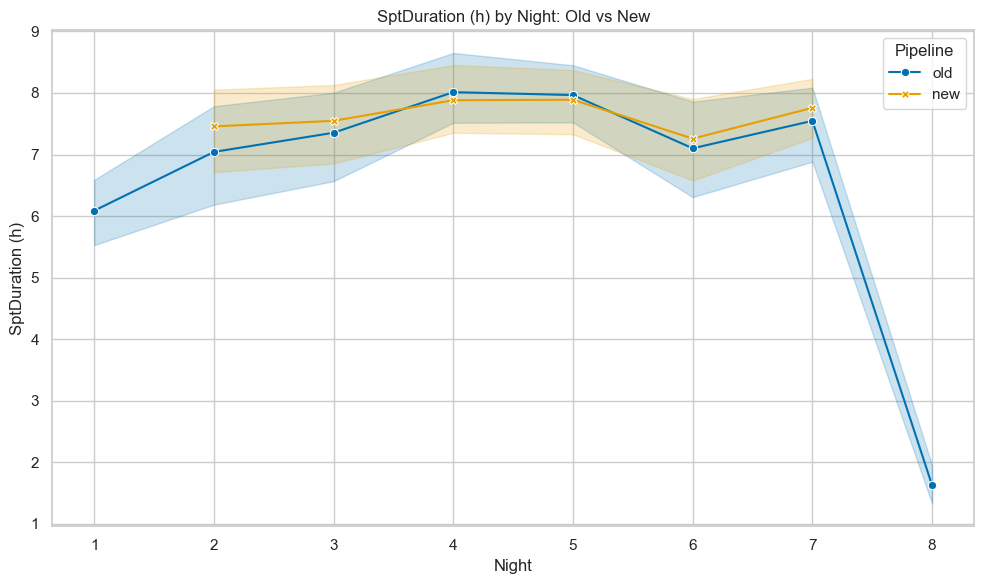

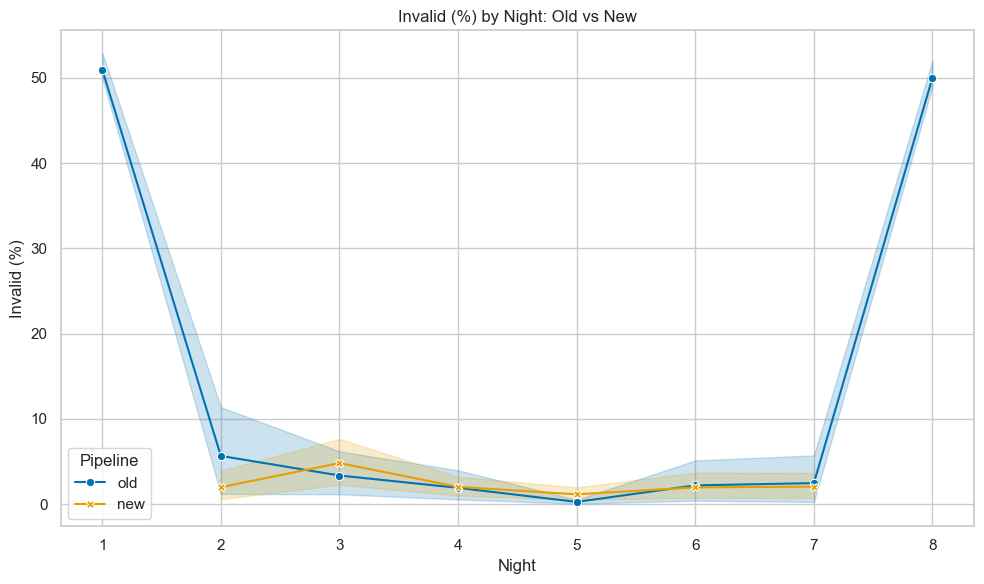

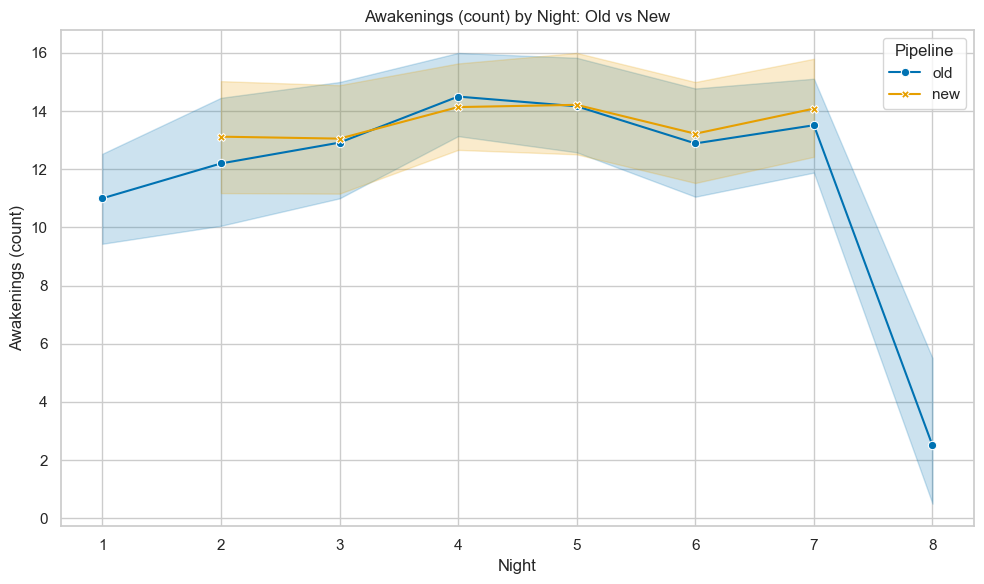

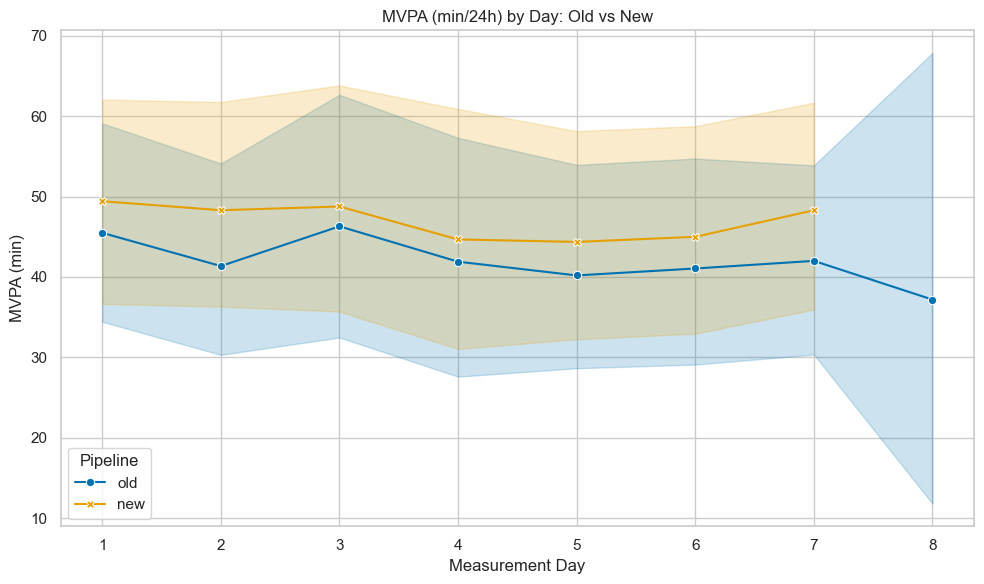

In [62]:
import os
import glob
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Setup seaborn for accessibility
sns.set(style="whitegrid")
palette = {"old": "#0072B2", "new": "#E69F00"}

# Base directories
old_base = "/Volumes/vosslabhpc/Projects/BOOST/ObservationalStudy/3-experiment/data/act-obs-test/derivatives/GGIR-2.8.2-test"
new_base = "/Volumes/vosslabhpc/Projects/BOOST/ObservationalStudy/3-experiment/data/act-obs-test/derivatives/GGIR-3.2.6-test"

# Helper to extract subject ID
def get_subj(path):
    return re.search(r"(sub-\d+)", path).group(1)

# -----------------------------------------------------------------------------
# 1) Sleep metrics: find files, load, merge subjects, concat
# -----------------------------------------------------------------------------
old_sleep_files = glob.glob(os.path.join(old_base, "sub-*", "ses-*", "output_accel", "results", "part4_nightsummary_sleep_cleaned.csv"))
new_sleep_files = glob.glob(os.path.join(new_base, "sub-*", "accel", "output_accel", "results", "part4_nightsummary_sleep_cleaned.csv"))

old_sleep_map = {get_subj(p): p for p in old_sleep_files}
new_sleep_map = {get_subj(p): p for p in new_sleep_files}
common_sleep = sorted(set(old_sleep_map) & set(new_sleep_map))

sleep_dfs = []
for subj in common_sleep:
    df_old = pd.read_csv(old_sleep_map[subj])
    df_old["pipeline"] = "old"
    df_old["subject"] = subj

    df_new = pd.read_csv(new_sleep_map[subj])
    df_new["pipeline"] = "new"
    df_new["subject"] = subj

    sleep_dfs.append(df_old)
    sleep_dfs.append(df_new)

sleep_df = pd.concat(sleep_dfs, ignore_index=True)

# Melt to long form
sleep_long = sleep_df.melt(
    id_vars=["subject", "night", "pipeline"],
    value_vars=["SptDuration", "fraction_night_invalid", "number_of_awakenings"],
    var_name="metric",
    value_name="value"
)
# convert fraction to percent
sleep_long.loc[sleep_long.metric == "fraction_night_invalid", "value"] *= 100

# Plot each sleep metric
for metric, ylabel in [
    ("SptDuration", "SptDuration (h)"),
    ("fraction_night_invalid", "Invalid (%)"),
    ("number_of_awakenings", "Awakenings (count)")
]:
    dfm = sleep_long[sleep_long.metric == metric]
    plt.figure(figsize=(10, 6))
    sns.lineplot(
        data=dfm,
        x="night",
        y="value",
        hue="pipeline",
        style="pipeline",
        markers=True,
        dashes=False,
        palette=palette
    )
    plt.title(f"{ylabel} by Night: Old vs New")
    plt.xlabel("Night")
    plt.ylabel(ylabel)
    plt.legend(title="Pipeline")
    plt.tight_layout()
    plt.show()

# -----------------------------------------------------------------------------
# 2) MVPA metric: find files, load, merge subjects, concat
# -----------------------------------------------------------------------------
old_act_files = glob.glob(os.path.join(old_base, "sub-*", "ses-*", "output_accel", "results", "part2_daysummary.csv"))
new_act_files = glob.glob(os.path.join(new_base, "sub-*", "accel", "output_accel", "results", "part2_daysummary.csv"))

old_act_map = {get_subj(p): p for p in old_act_files}
new_act_map = {get_subj(p): p for p in new_act_files}
common_act = sorted(set(old_act_map) & set(new_act_map))

act_dfs = []
for subj in common_act:
    df_old = pd.read_csv(old_act_map[subj])
    df_old = df_old.rename(columns={"MVPA_E5S_B1M80._T100_ENMO_0.24hr": "mvpa"})
    df_old["pipeline"] = "old"
    df_old["subject"] = subj

    df_new = pd.read_csv(new_act_map[subj])
    df_new = df_new.rename(columns={"MVPA_E5S_B1M80%_T100_ENMO_0-24hr": "mvpa"})
    df_new["pipeline"] = "new"
    df_new["subject"] = subj

    act_dfs.append(df_old)
    act_dfs.append(df_new)

act_df = pd.concat(act_dfs, ignore_index=True)

# Melt to long form
act_long = act_df.melt(
    id_vars=["subject", "measurementday", "pipeline"],
    value_vars=["mvpa"],
    var_name="metric",
    value_name="value"
)

# Plot MVPA
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=act_long,
    x="measurementday",
    y="value",
    hue="pipeline",
    style="pipeline",
    markers=True,
    dashes=False,
    palette=palette
)
plt.title("MVPA (min/24h) by Day: Old vs New")
plt.xlabel("Measurement Day")
plt.ylabel("MVPA (min)")
plt.legend(title="Pipeline")
plt.tight_layout()
plt.show()

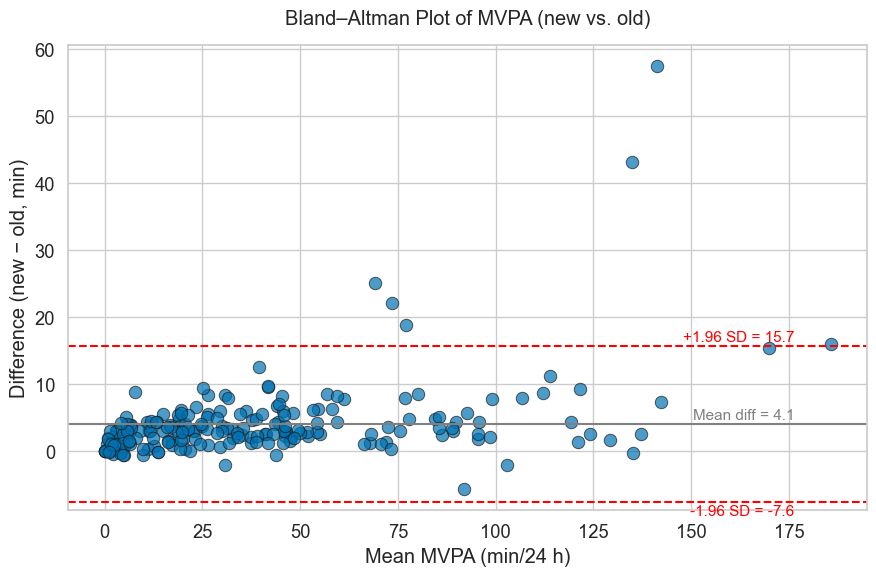

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# seaborn aesthetics
sns.set(style="whitegrid", font_scale=1.2)
palette = {"old": "#0072B2", "new": "#E69F00"}
point_color = palette["old"]

# 1) identify first & last nights for the 'old' pipeline
extremes = (
    act_df[act_df.pipeline == "old"]
    .groupby("subject")["measurementday"]
    .agg(["min", "max"])
    .reset_index()
)

# 2) merge and drop those extremes from the old pipeline
act_merged = act_df.merge(extremes, on="subject", how="left")

# now filter using the merged 'min' and 'max' columns
act2 = act_merged.loc[~(
    (act_merged.pipeline == "old") &
    ((act_merged.measurementday == act_merged["min"]) |
     (act_merged.measurementday == act_merged["max"]))
)]

# 3) pivot to wide form, aggregating any duplicates by mean
ba = (
    act2
    .groupby(["subject", "measurementday", "pipeline"])["mvpa"]
    .mean()
    .reset_index()
    .pivot(index=["subject", "measurementday"], columns="pipeline", values="mvpa")
    .dropna()
    .reset_index()
)

# 4) compute Bland–Altman stats
ba["avg"]  = ba[["old", "new"]].mean(axis=1)
ba["diff"] = ba["new"] - ba["old"]

mean_diff = ba["diff"].mean()
sd_diff   = ba["diff"].std()
upper     = mean_diff + 1.96 * sd_diff
lower     = mean_diff - 1.96 * sd_diff

# 5) plot
plt.figure(figsize=(9, 6))
ax = sns.scatterplot(
    data=ba,
    x="avg",
    y="diff",
    color=point_color,
    edgecolor="k",
    s=80,
    alpha=0.7
)

# mean & limits
ax.axhline(mean_diff, linestyle="-", color="grey", linewidth=1.5)
ax.axhline(upper,     linestyle="--", color="red",  linewidth=1.5)
ax.axhline(lower,     linestyle="--", color="red",  linewidth=1.5)

# annotations
xpos = ba["avg"].max() * 0.95
ax.text(xpos, mean_diff + sd_diff * 0.05, f"Mean diff = {mean_diff:.1f}", ha="right", va="bottom", fontsize=11, color="grey")
ax.text(xpos, upper + sd_diff * 0.05,     f"+1.96 SD = {upper:.1f}",       ha="right", va="bottom", fontsize=11, color="red")
ax.text(xpos, lower - sd_diff * 0.05,     f"-1.96 SD = {lower:.1f}",       ha="right", va="top",    fontsize=11, color="red")

# labels & title
ax.set_title("Bland–Altman Plot of MVPA (new vs. old)", pad=15)
ax.set_xlabel("Mean MVPA (min/24 h)")
ax.set_ylabel("Difference (new − old, min)")

plt.tight_layout()
plt.show()